In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=03b534bbb16072223cd4901698c8d1bd


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        print(city)
# Print the city count to confirm sufficient count.
len(cities)

klaksvik
okahandja
cabo san lucas
moron
cayenne
ilulissat
lata
taolanaro
port alfred
mataura
esfarayen
illoqqortoormiut
bluff
eau claire
sentyabrskiy
kavieng
berea
bandarbeyla
kumluca
aykhal
new norfolk
daru
paamiut
narsaq
waipawa
kahului
lapua
burnie
saint-pierre
norman wells
asfi
busselton
ushuaia
airai
talara
nakhon ratchasima
rikitea
carnarvon
yellowknife
troitsko-pechorsk
brae
puerto suarez
bondo
vaini
landskrona
cidreira
hilo
bathsheba
albany
hasaki
tasiilaq
souillac
manzil jamil
coquimbo
kapaa
jamestown
punta arenas
pevek
palafrugell
ponta do sol
pisco
dikson
harnai
arraial do cabo
praia
puerto ayora
yanaul
butaritari
atuona
victoria
grindavik
tezu
orange
salalah
amderma
chuy
biak
iqaluit
nikolskoye
saint-philippe
altay
port elizabeth
meyungs
cape town
san jeronimo
cap malheureux
artyom
barentsburg
castro
atar
nanortalik
springbok
thompson
hobart
nemuro
vanimo
ocho rios
jasper
lebu
alofi
east london
provideniya
andra
mys shmidta
okandja
haines junction
hirna
the valley
marsa mat

586

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | okahandja
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | moron
Processing Record 5 of Set 1 | cayenne
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | esfarayen
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | eau claire
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | berea
Processing Record 18 of Set 1 | bandarbeyla
Processing Record 19 of Set 1 | kumluca
Processing Record 20 of Set 1 | aykhal
Processing Record 21 of Set 1 | ne

Processing Record 39 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 4 | taltal
Processing Record 41 of Set 4 | tabora
Processing Record 42 of Set 4 | ketchikan
Processing Record 43 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | camacari
Processing Record 46 of Set 4 | bredasdorp
Processing Record 47 of Set 4 | adre
Processing Record 48 of Set 4 | dashitou
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | nishihara
Processing Record 1 of Set 5 | general pico
Processing Record 2 of Set 5 | cabras
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | el balyana
City not found. Skipping...
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | wagar
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | isangel
Processing Record 10 of Set 5 | portland
Processing Record 11 of Set 5 | tsienyane
C

Processing Record 29 of Set 8 | calama
Processing Record 30 of Set 8 | gushikawa
Processing Record 31 of Set 8 | narrabri
Processing Record 32 of Set 8 | saint thomas
Processing Record 33 of Set 8 | mackay
Processing Record 34 of Set 8 | narasannapeta
Processing Record 35 of Set 8 | kofele
Processing Record 36 of Set 8 | camacha
Processing Record 37 of Set 8 | nyrob
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | wana
Processing Record 41 of Set 8 | shambu
Processing Record 42 of Set 8 | berthierville
Processing Record 43 of Set 8 | uruacu
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | inongo
Processing Record 46 of Set 8 | fort nelson
Processing Record 47 of Set 8 | keti bandar
Processing Record 48 of Set 8 | pudozh
Processing Record 49 of Set 8 | adrar
Processing Record 50 of Set 8 | gawler
Processing Record 1 of Set 9 | kyshtovka
Processing Record 2 of Set 9 | acireale


Processing Record 18 of Set 12 | rawson
Processing Record 19 of Set 12 | matveyevka
Processing Record 20 of Set 12 | aflu
City not found. Skipping...
Processing Record 21 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 22 of Set 12 | kanye
Processing Record 23 of Set 12 | senador pompeu
Processing Record 24 of Set 12 | kieta
Processing Record 25 of Set 12 | mitake
Processing Record 26 of Set 12 | bastrop
Processing Record 27 of Set 12 | alyangula
Processing Record 28 of Set 12 | dakoro
Processing Record 29 of Set 12 | port macquarie
Processing Record 30 of Set 12 | banja luka
Processing Record 31 of Set 12 | casma
Processing Record 32 of Set 12 | prince rupert
Processing Record 33 of Set 12 | ust-maya
Processing Record 34 of Set 12 | mecca
Processing Record 35 of Set 12 | majene
Processing Record 36 of Set 12 | andevoranto
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,49.12,91,100,29.10,FO,2022-11-07 04:18:45
1,Okahandja,-21.9833,16.9167,55.00,77,98,8.95,NA,2022-11-07 04:23:48
2,Cabo San Lucas,22.8909,-109.9124,73.51,74,9,4.00,MX,2022-11-07 04:13:15
3,Moron,-34.6534,-58.6198,67.96,69,9,10.67,AR,2022-11-07 04:18:20
4,Cayenne,4.9333,-52.3333,75.24,94,75,3.44,GF,2022-11-07 04:18:44
5,Ilulissat,69.2167,-51.1000,-2.65,93,76,7.14,GL,2022-11-07 04:17:41
6,Lata,40.1629,-8.3327,54.07,94,98,2.66,PT,2022-11-07 04:23:49
7,Port Alfred,-33.5906,26.8910,67.17,84,100,5.99,ZA,2022-11-07 04:17:39
8,Mataura,-46.1927,168.8643,62.06,52,88,9.01,NZ,2022-11-07 04:17:28
9,Esfarayen,37.0765,57.5101,38.86,66,100,5.91,IR,2022-11-07 04:23:50


In [8]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [9]:
new_city_data_order= ['City', 'Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']

In [10]:
new_city_data_order_df= city_data_df[new_city_data_order]
new_city_data_order_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-11-07 04:18:45,62.2266,-6.5890,49.12,91,100,29.10
1,Okahandja,NA,2022-11-07 04:23:48,-21.9833,16.9167,55.00,77,98,8.95
2,Cabo San Lucas,MX,2022-11-07 04:13:15,22.8909,-109.9124,73.51,74,9,4.00
3,Moron,AR,2022-11-07 04:18:20,-34.6534,-58.6198,67.96,69,9,10.67
4,Cayenne,GF,2022-11-07 04:18:44,4.9333,-52.3333,75.24,94,75,3.44
5,Ilulissat,GL,2022-11-07 04:17:41,69.2167,-51.1000,-2.65,93,76,7.14
6,Lata,PT,2022-11-07 04:23:49,40.1629,-8.3327,54.07,94,98,2.66
7,Port Alfred,ZA,2022-11-07 04:17:39,-33.5906,26.8910,67.17,84,100,5.99
8,Mataura,NZ,2022-11-07 04:17:28,-46.1927,168.8643,62.06,52,88,9.01
9,Esfarayen,IR,2022-11-07 04:23:50,37.0765,57.5101,38.86,66,100,5.91


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/06/22'

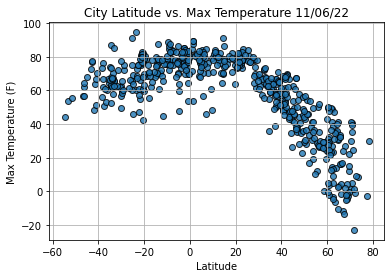

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

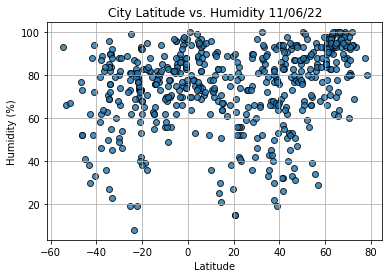

In [15]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

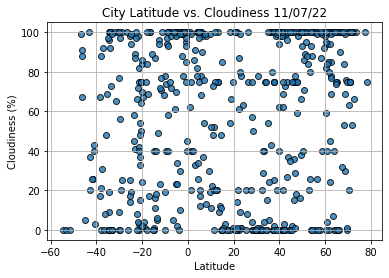

In [16]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

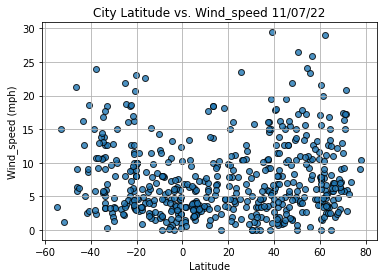

In [17]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()